In [1]:
from google.colab import files
uploaded = files.upload()

Saving employees.csv to employees.csv


In [2]:
import pandas as pd
import csv
import os
df = pd.read_csv("employees.csv")
print(f"File size in bytes: {df.memory_usage(deep=True).sum()}")
print(f"Number of records: {len(df)}")

File size in bytes: 13196189
Number of records: 20000


In [3]:
file_path = "employees.csv"
file_size = os.path.getsize(file_path)
print(f"File size on disk: {file_size} bytes")

File size on disk: 3030111 bytes


In [4]:
name_count_null = df['name'].isnull().sum()
print(f"Assertion with missing name: {name_count_null} ")

eid_count_null = df['eid'].isnull().sum()
print(f"Assertion with missing eid: {eid_count_null}")

Assertion with missing name: 19 
Assertion with missing eid: 0


In [5]:
df['hire_date'] = pd.to_datetime(df['hire_date'], errors='coerce')
before_2015 = df[df['hire_date'] < '2015-01-01']
print(f"Assertion for hired before 2015: {len(before_2015)}")

Assertion for hired before 2015: 18


In [6]:
violations_salary = df[df['salary'] > 100000]
print(f"Assertion for salary over $100,000: {len(violations_salary)}")

Assertion for salary over $100,000: 2202


In [8]:
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df['hire_date'] = pd.to_datetime(df['hire_date'], errors='coerce')

birth_before_hire = df[df['birth_date'] >= df['hire_date']]
print(f"Assertion for birth date not before hire date: {len(birth_before_hire)}")

Assertion for birth date not before hire date: 13


In [9]:
self_reporting = df[df['eid'] == df['reports_to']]
print(f"Assertion to see employees are reports to self: {len(self_reporting)}")

Assertion to see employees are reports to self: 1


In [12]:
manager_ids = set(df['reports_to'].dropna())
employee_ids = set(df['eid'])

invalid_manager_ids = manager_ids - employee_ids
invalid_managers = df[df['reports_to'].isin(invalid_manager_ids)]
print(f"Assertion to find invalid manager ID: {len(invalid_managers)}")

Assertion to find invalid manager ID: 7673


In [13]:
duplicate_eids = df[df.duplicated('eid', keep=False)]
print(f"Assertion to find Duplicate employee IDs: {len(duplicate_eids)} ")

Assertion to find Duplicate employee IDs: 8066 


In [14]:
city_counts = df['city'].value_counts()

cities_with_one = city_counts[city_counts <= 1]
print(f"Assertion to find cities with only one employee: {len(cities_with_one)}")

Assertion to find cities with only one employee: 10024


In [19]:
country_counts = df['country'].value_counts()

country_less_two = country_counts[country_counts <= 2]
print(f"Assertion to find country with only two employee: {len(country_less_two)} ")

Assertion to find country with only two employee: 0 


In [20]:
import matplotlib.pyplot as plt

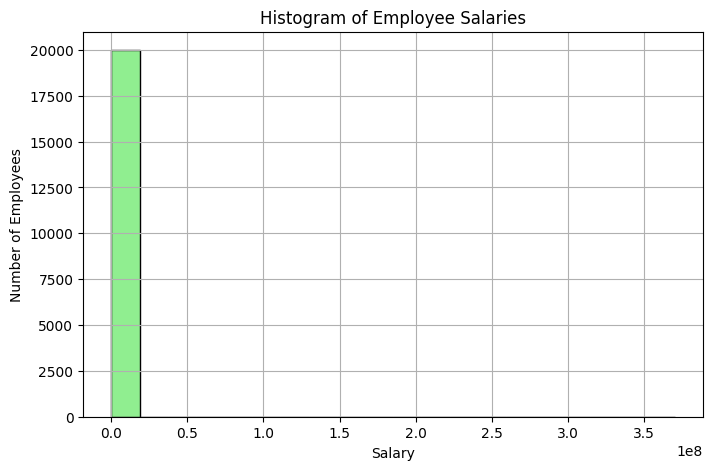


New Statistical Assertion: 94.38% of employees earn between $50,000 and $150,000.
The data satisfies the new statistical assertion.


In [24]:
salaries = []

for _, row in df.iterrows():
    try:
        salary = float(row['salary'])
        salaries.append(salary)
    except (ValueError, TypeError):
        continue

plt.figure(figsize=(8, 5))
plt.hist(salaries, bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Employee Salaries')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

#New Assertion At least 90% of employees earn between $50,000 and $150,000
in_range = sum(1 for s in salaries if 50000 <= s <= 150000)
percentage_in_range = (in_range / len(salaries)) * 100

print(f"\nNew Statistical Assertion: {percentage_in_range:.2f}% of employees earn between $50,000 and $150,000.")

if percentage_in_range >= 90:
    print("The data satisfies the new statistical assertion.")
else:
    print("The data does NOT satisfy the new statistical assertion.")

